In [1]:
import argparse
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
os.chdir('../')


In [2]:
mz_bin = 2
rt_bin = 10
group = 'valid'
gkf = 0
exp_name = f'b14-b13-b12-b11-b10-b9-b8-b7-b6-b5-b4-b3-b2-b1_binary0_-1_gkf{gkf}_ovr0_mz0-10000rt0-320_na_h'
path =  f'/home/simon/MSML3/results/multi/mz{mz_bin}/rt{rt_bin}/ms2/200spd/thr0.0/all/' \
         f'{exp_name}/xgboost/'

dfs = {}
for group in ['valid', 'test']:
    # Get all csvs in the directory that ends with abs.csv
    csvs = os.listdir(path)
    csvs = [csv for csv in csvs if csv.endswith('abs.csv')]
    # Read the csvs into a list of dataframes
    dfs[group] = {csv.split('_')[3]: pd.read_csv(path + csv, index_col=0) for csv in csvs if csv.split('_')[0] == group}
    # Concatenate the dataframes


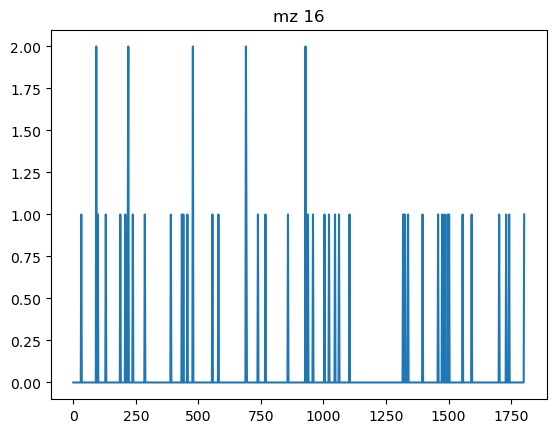

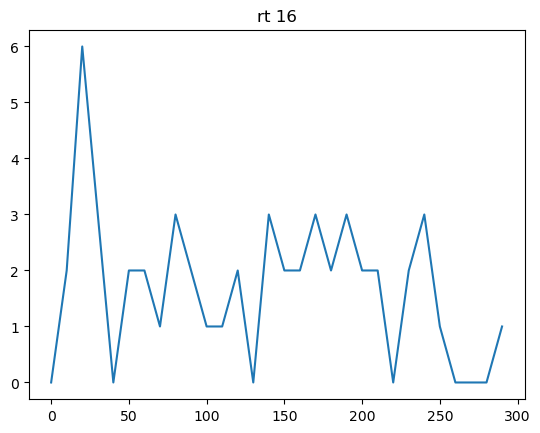

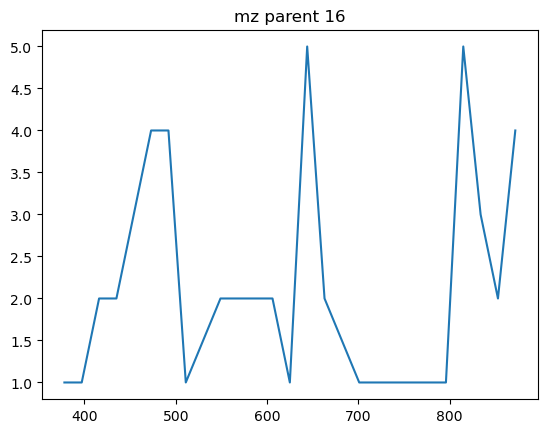

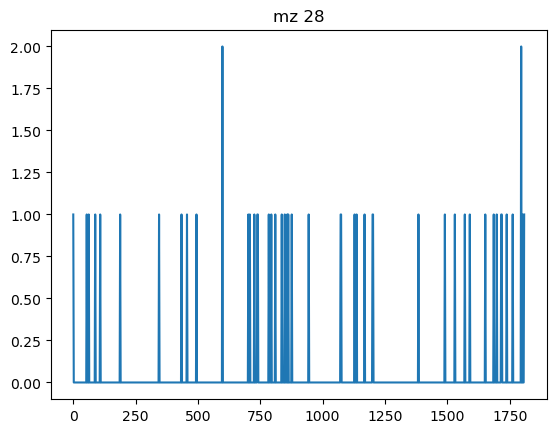

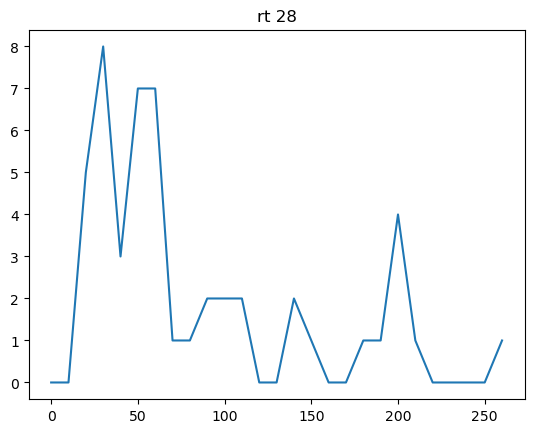

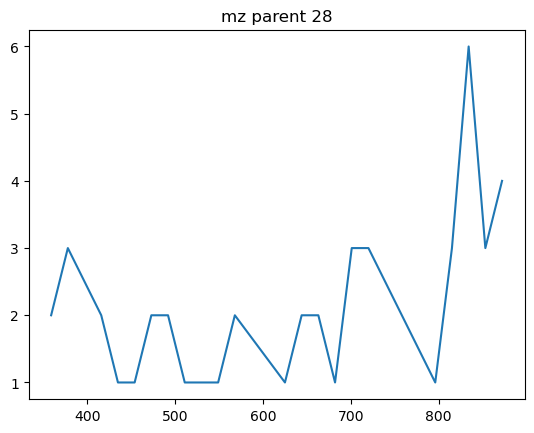

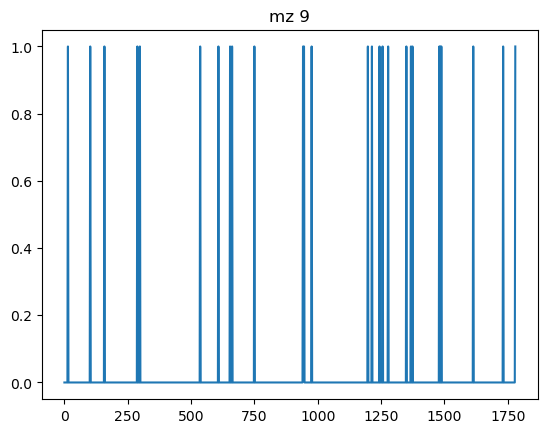

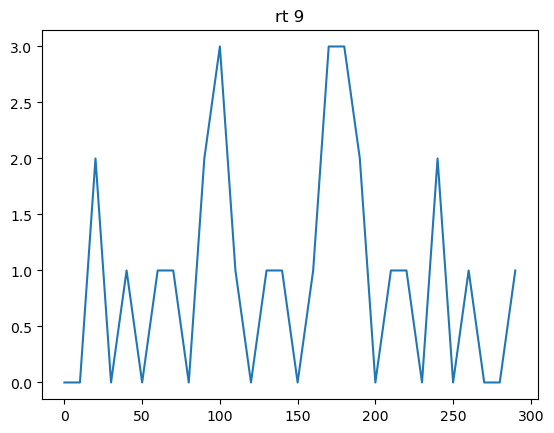

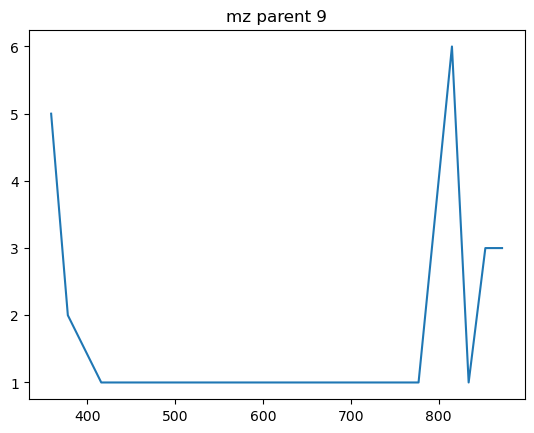

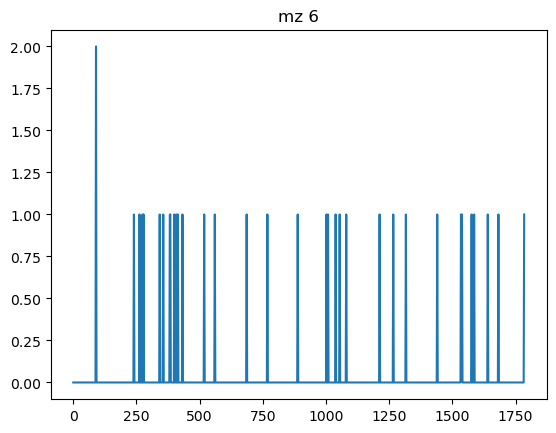

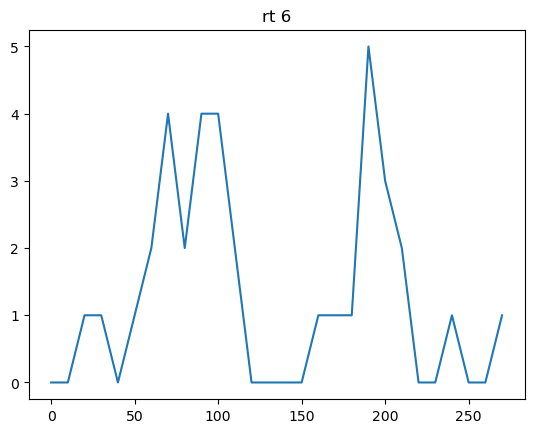

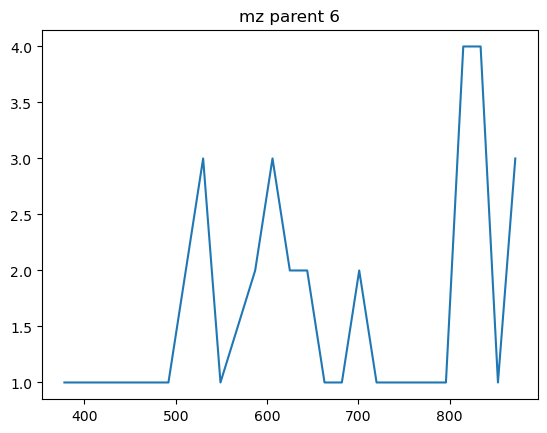

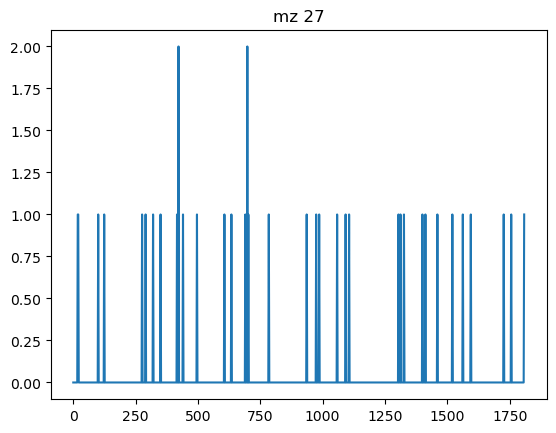

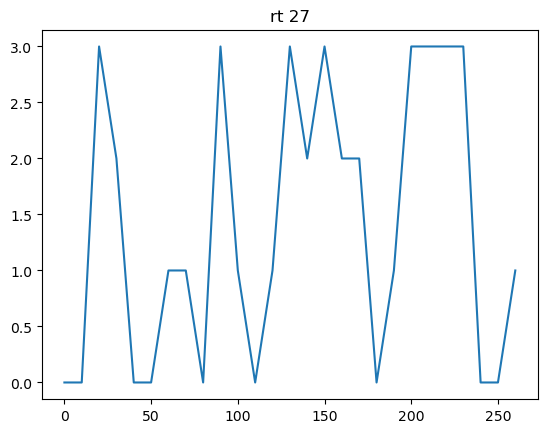

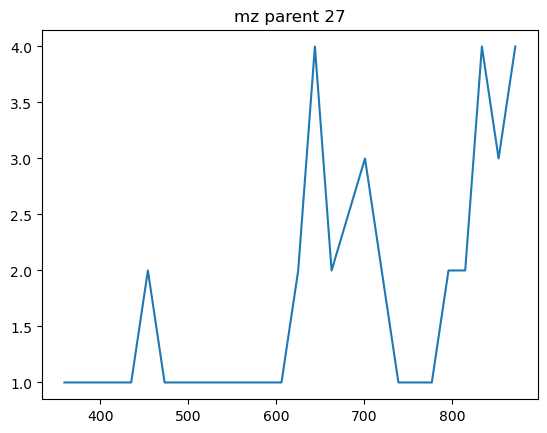

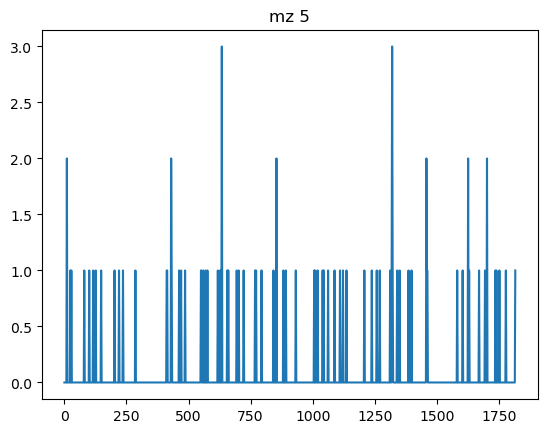

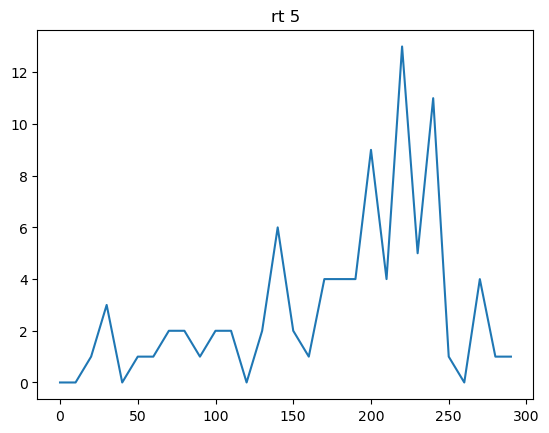

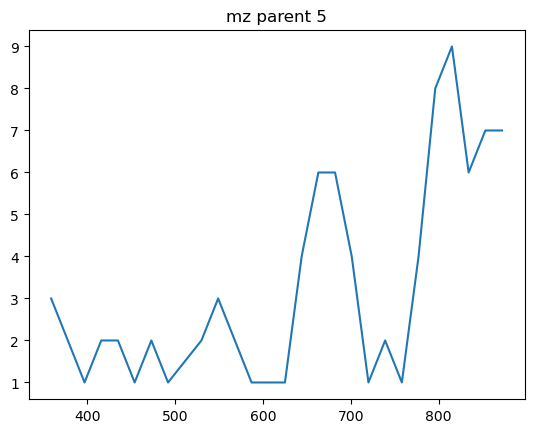

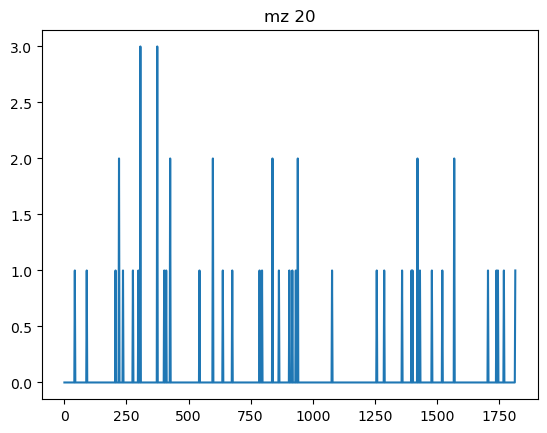

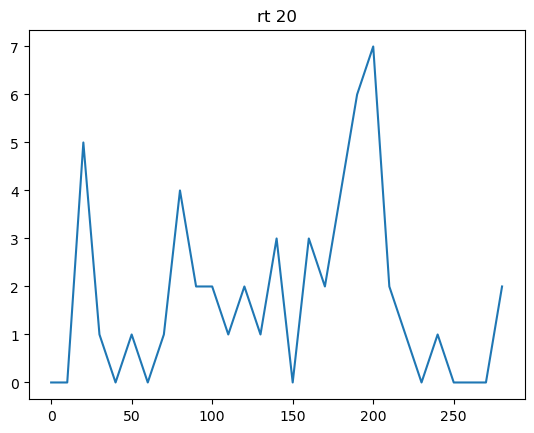

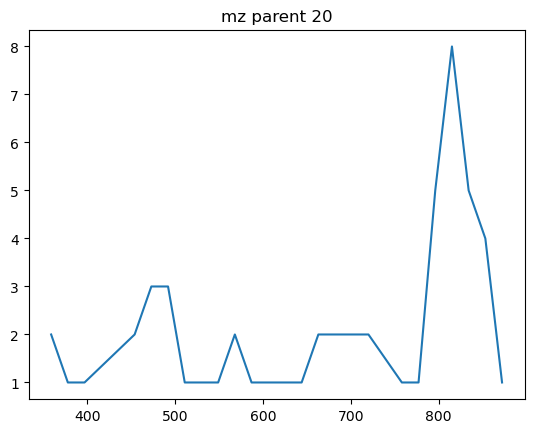

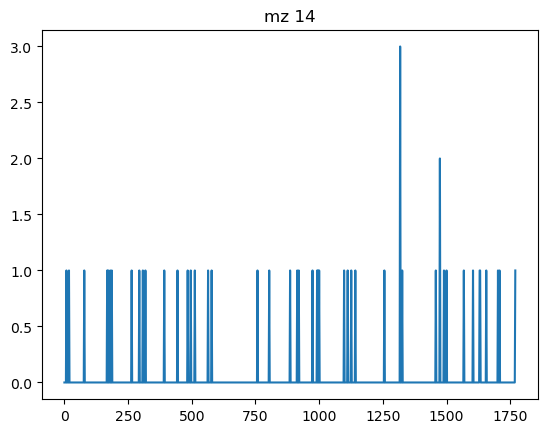

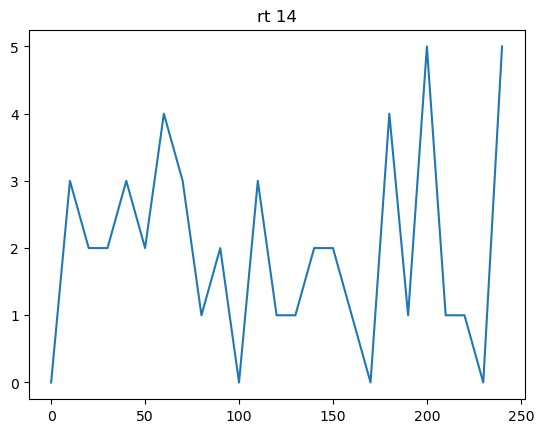

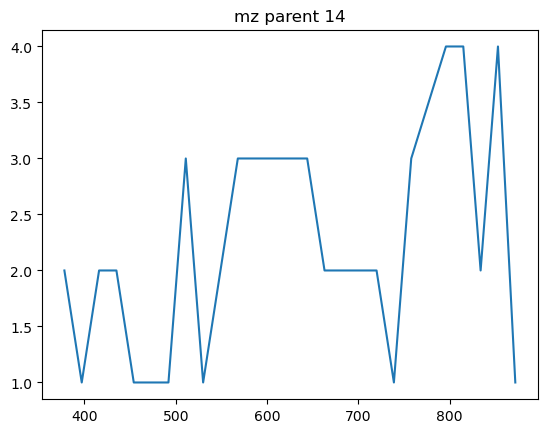

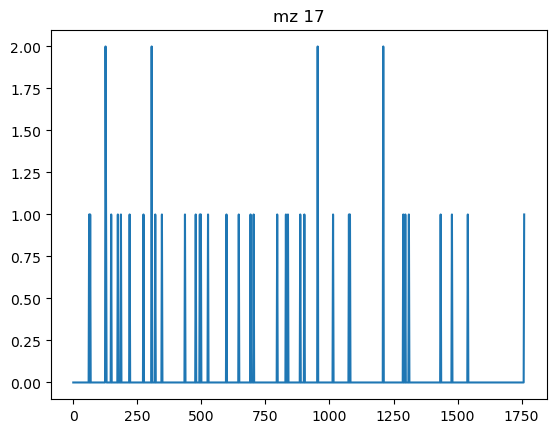

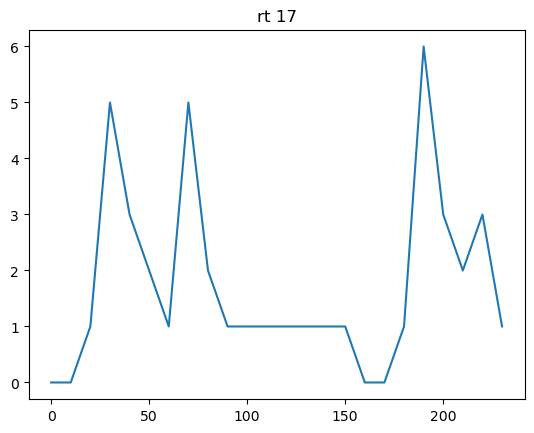

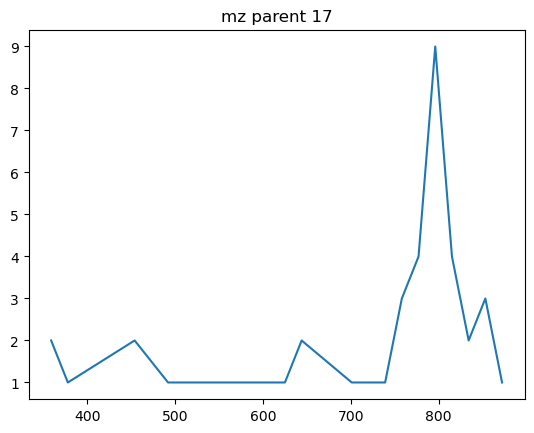

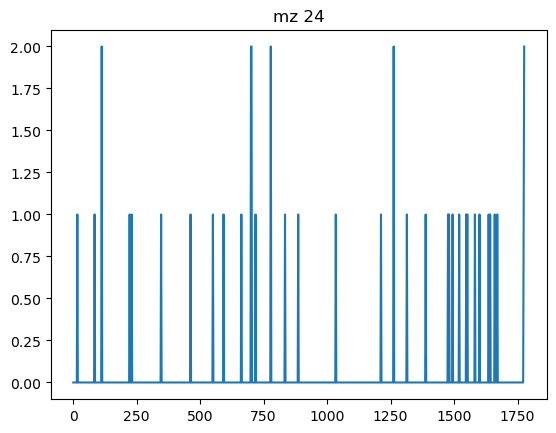

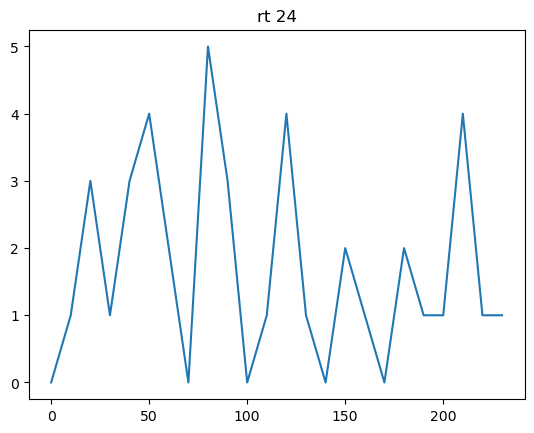

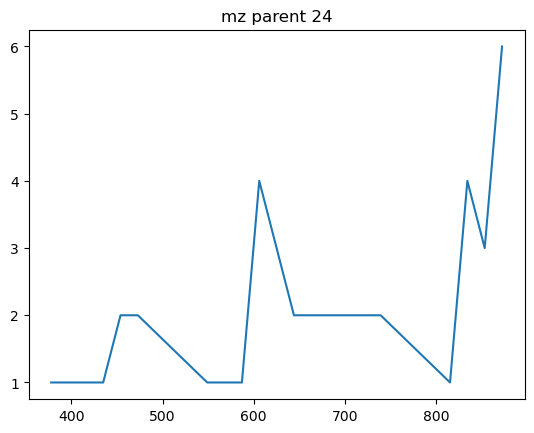

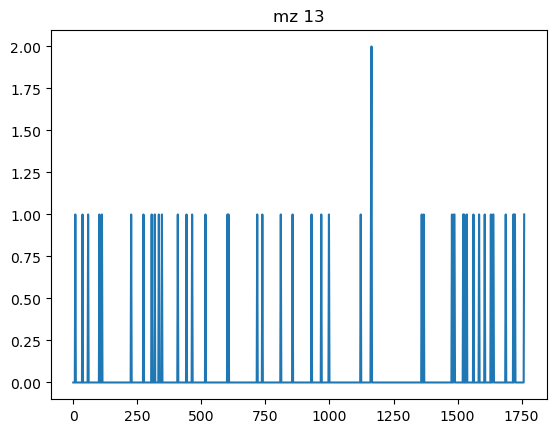

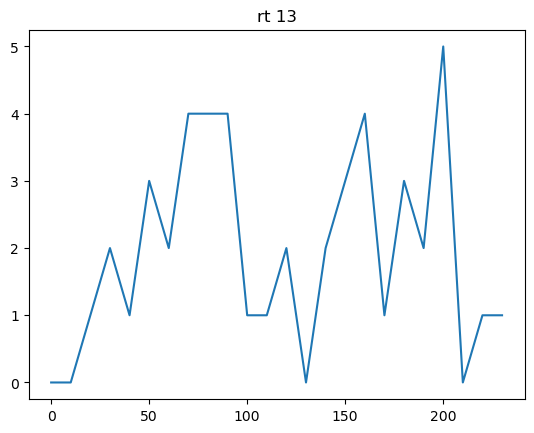

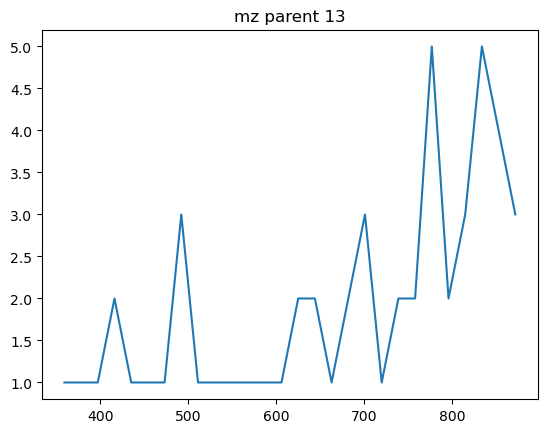

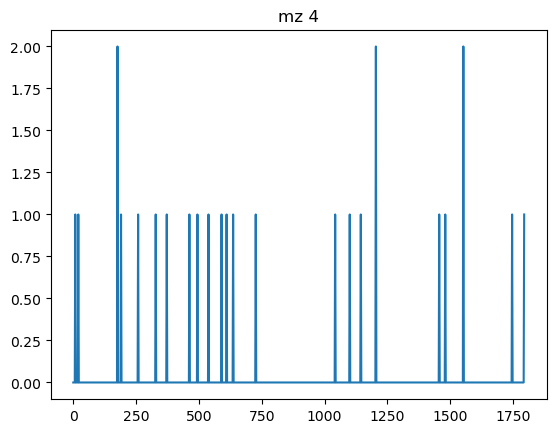

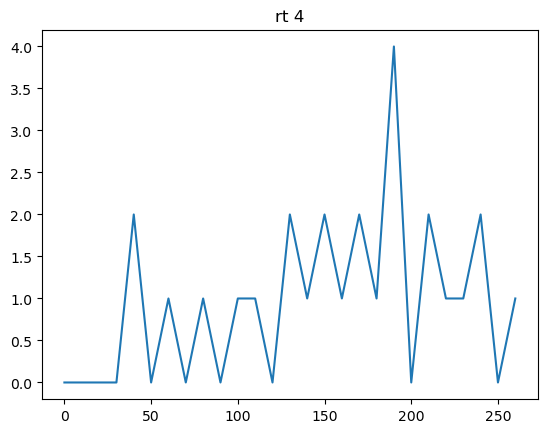

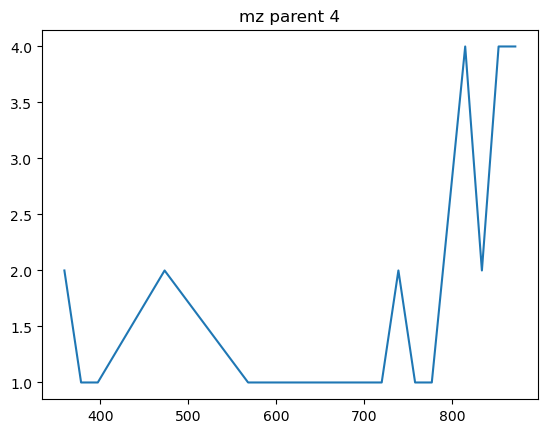

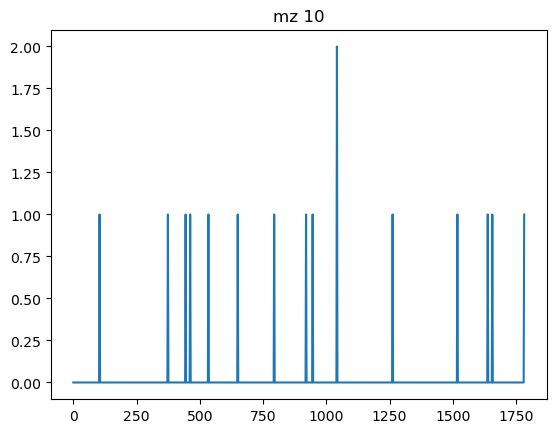

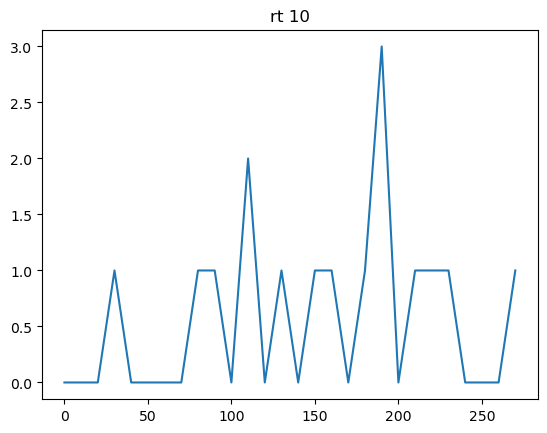

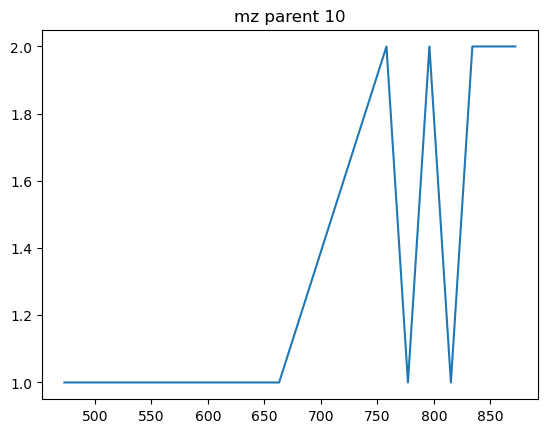

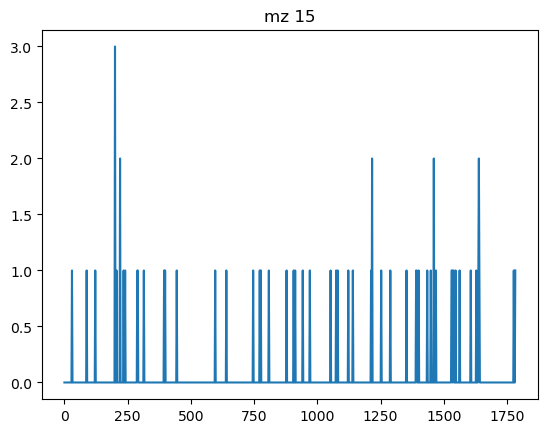

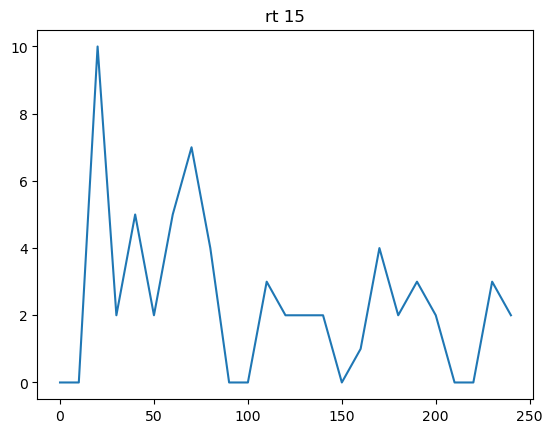

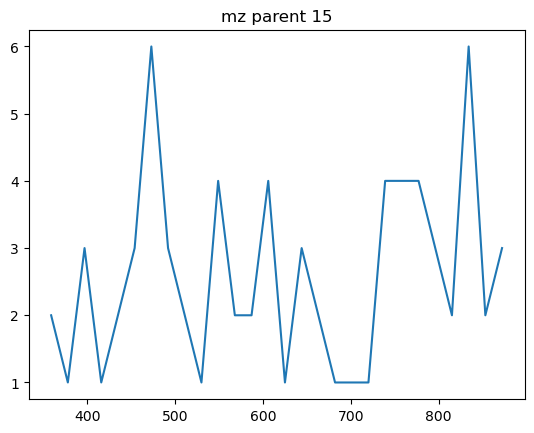

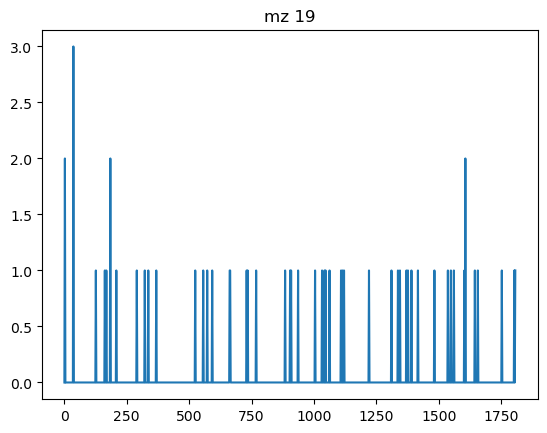

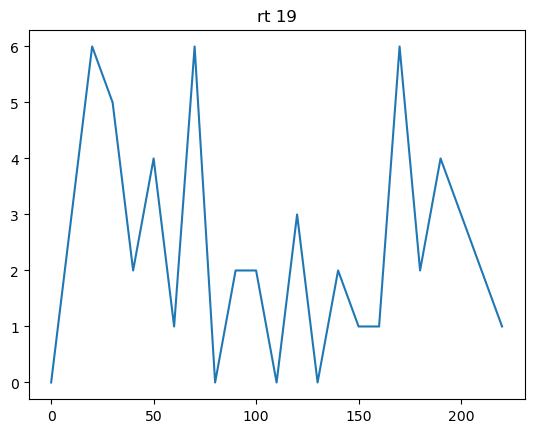

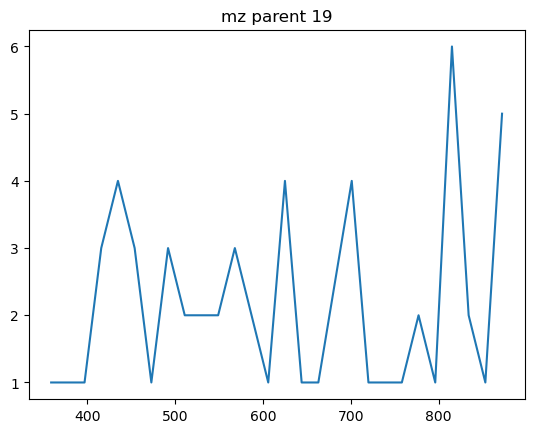

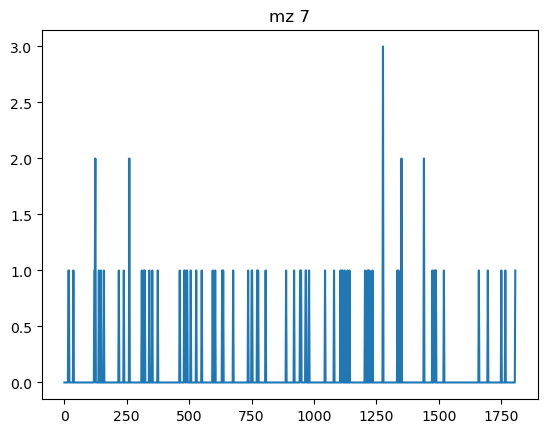

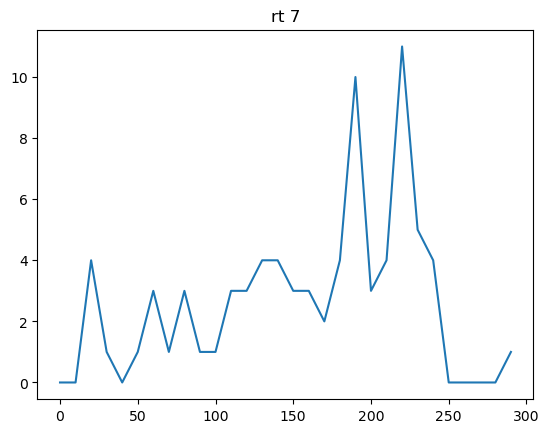

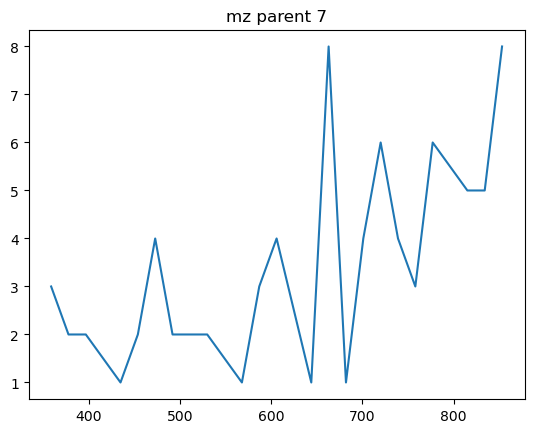

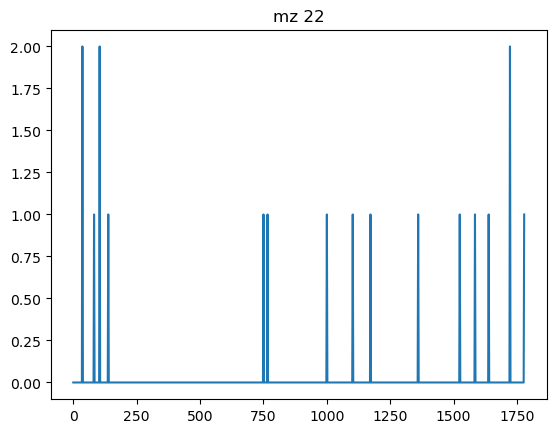

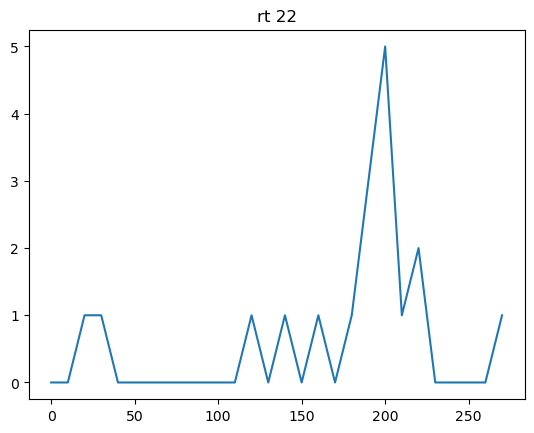

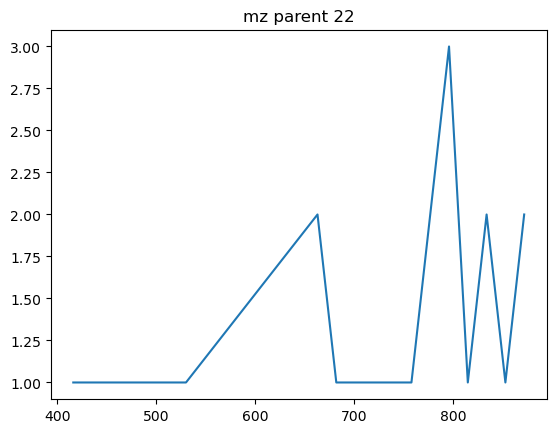

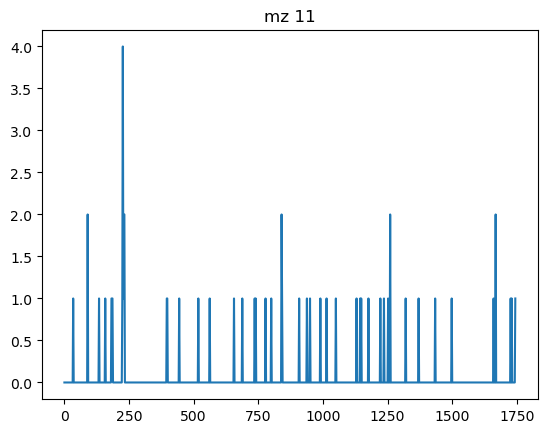

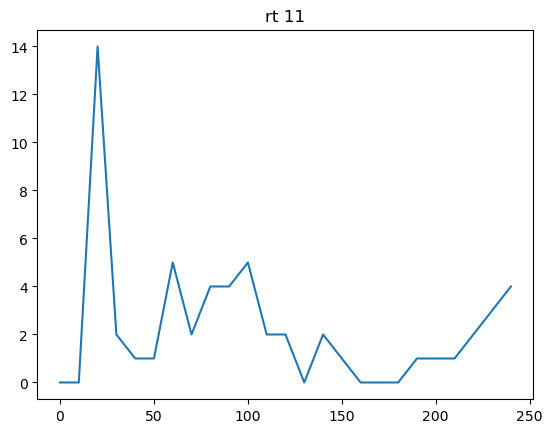

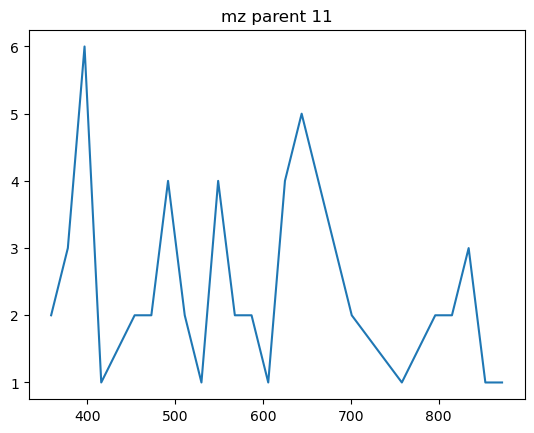

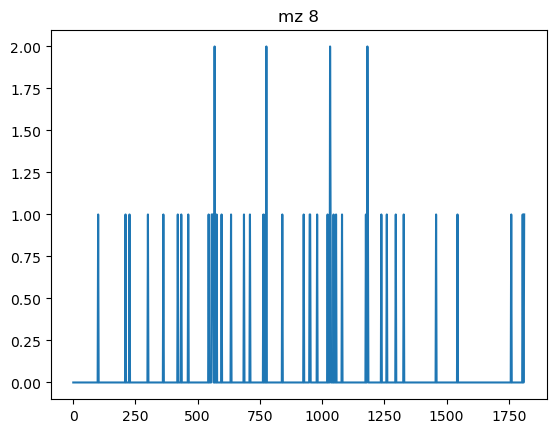

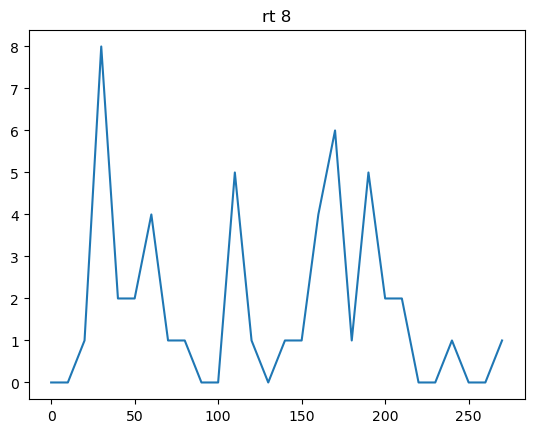

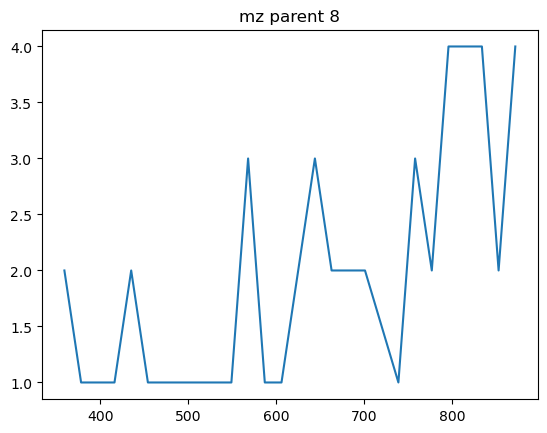

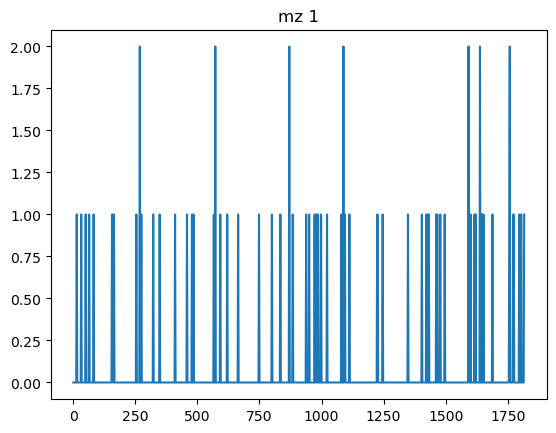

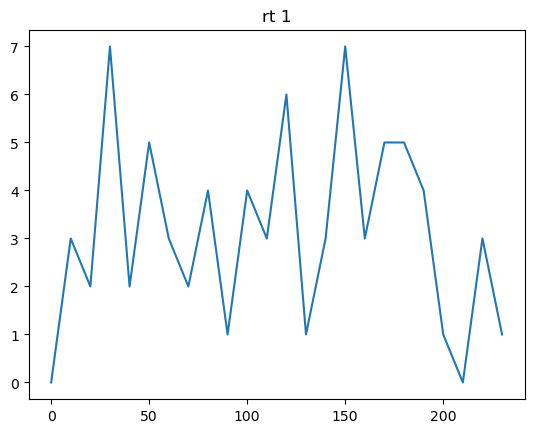

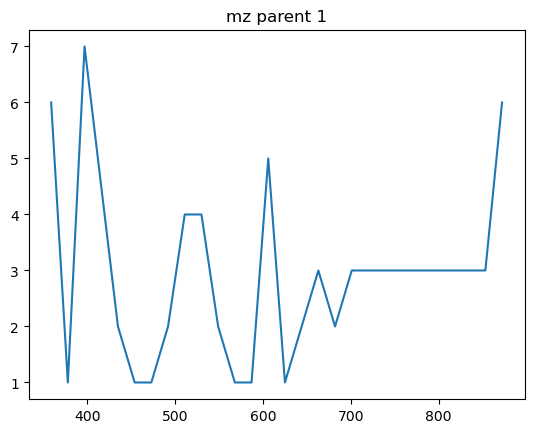

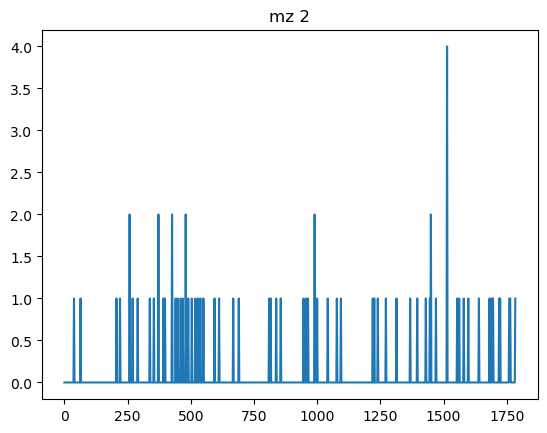

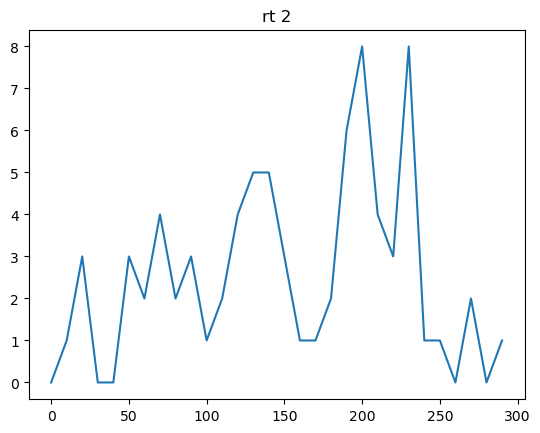

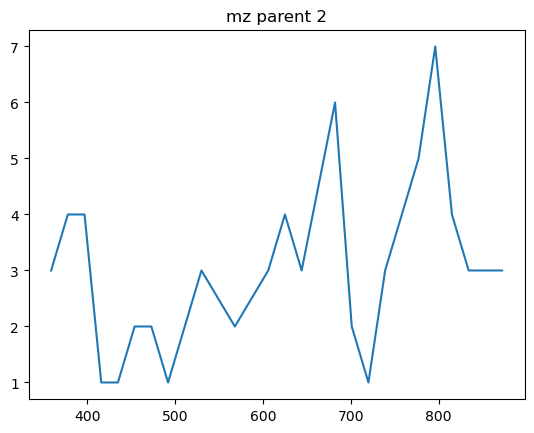

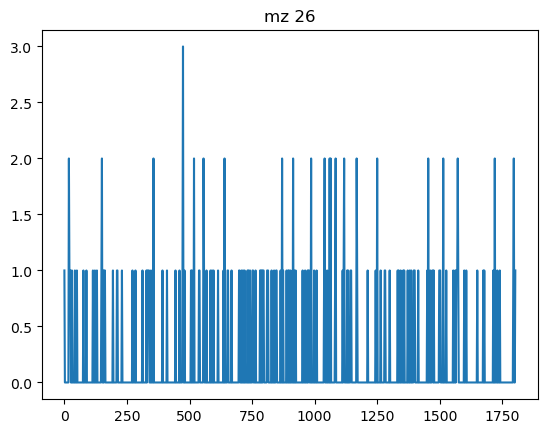

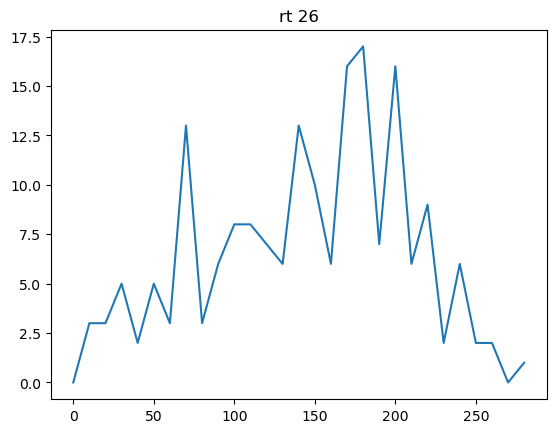

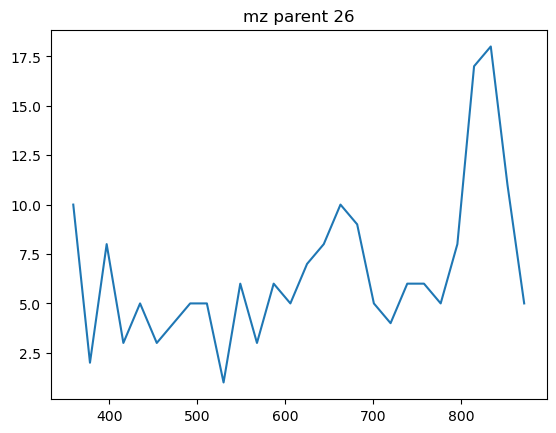

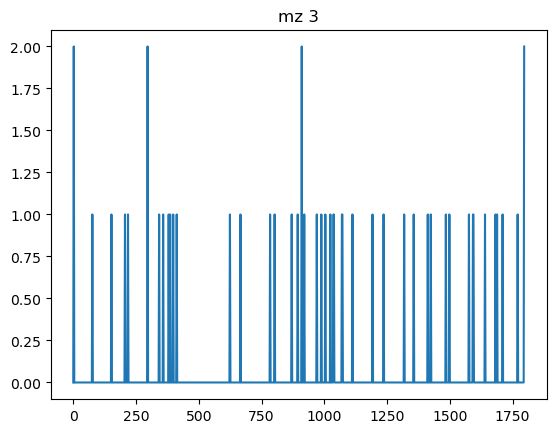

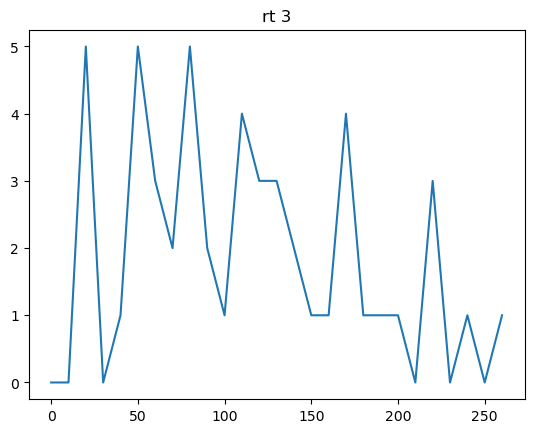

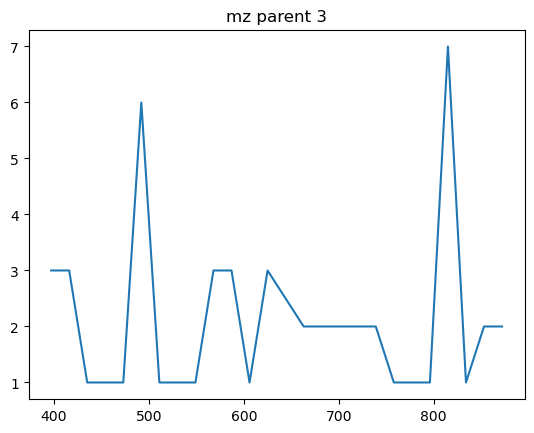

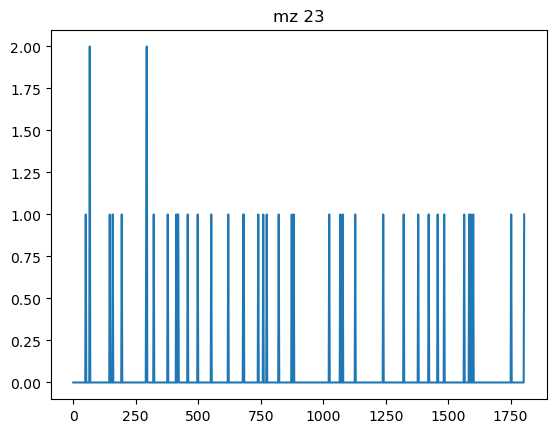

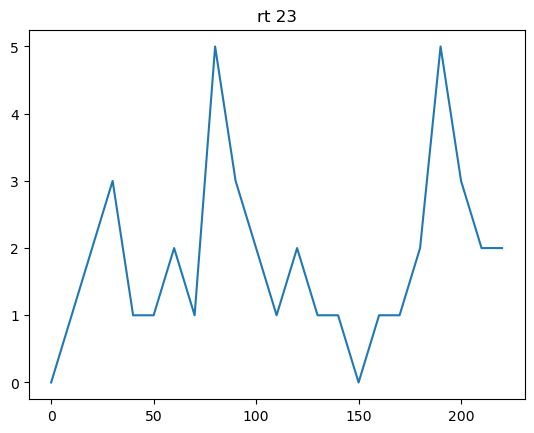

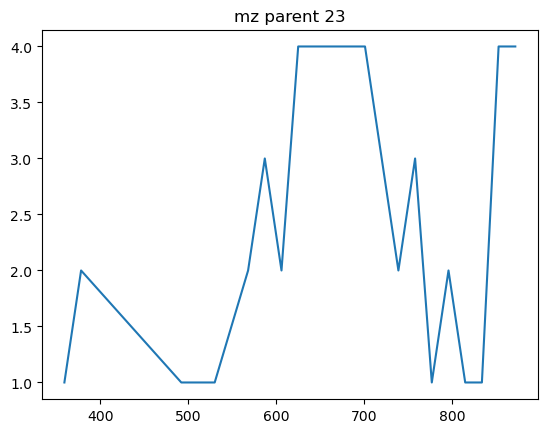

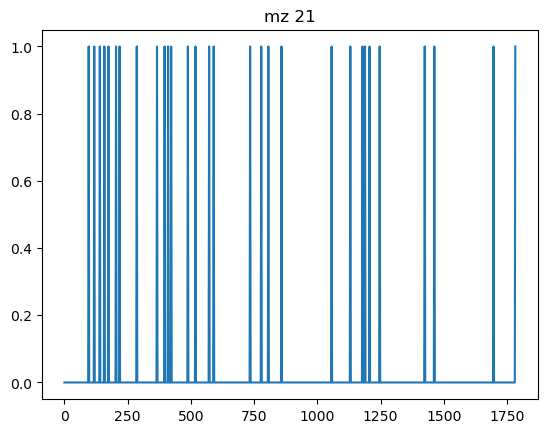

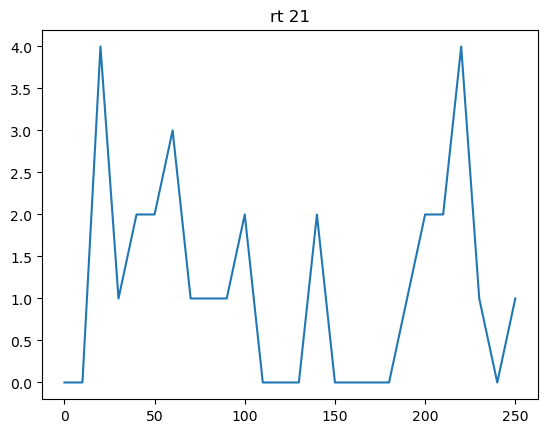

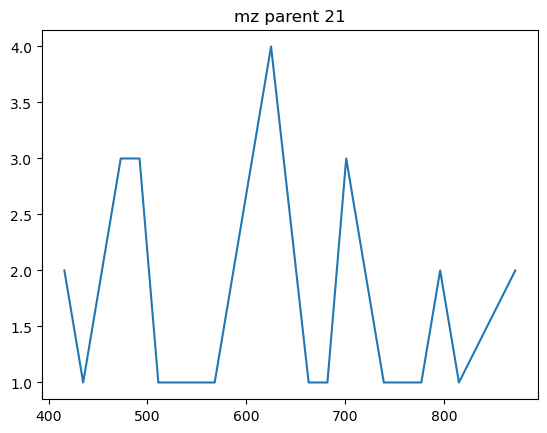

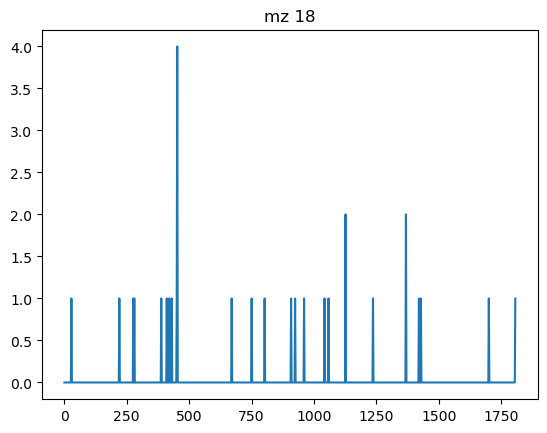

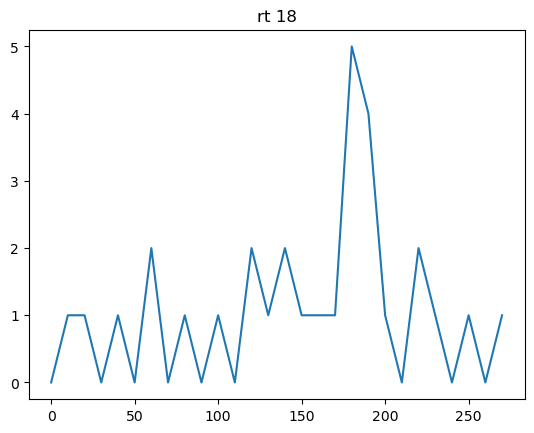

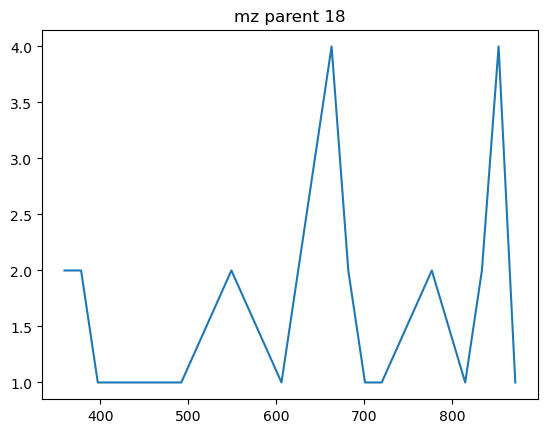

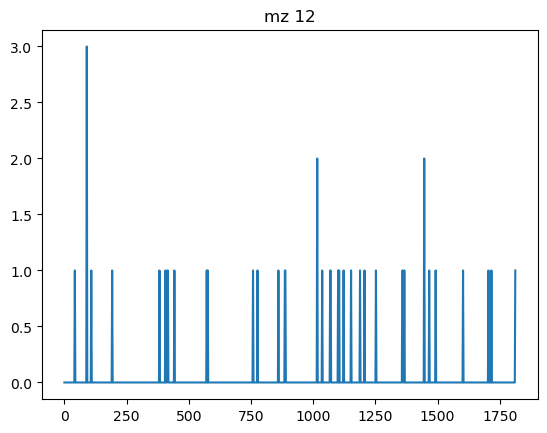

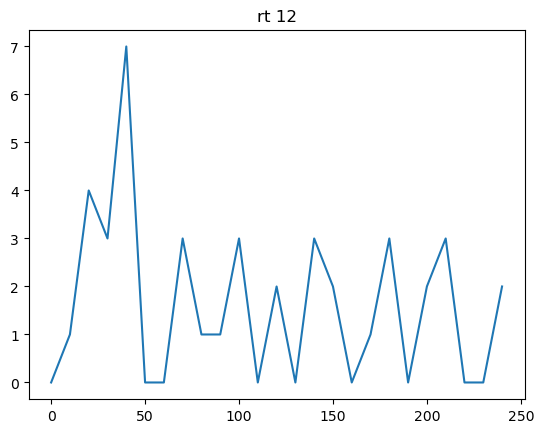

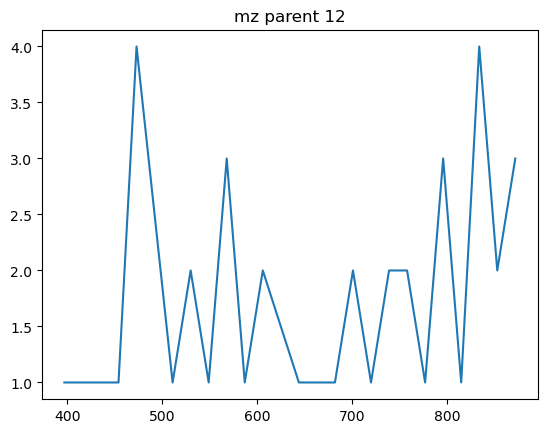

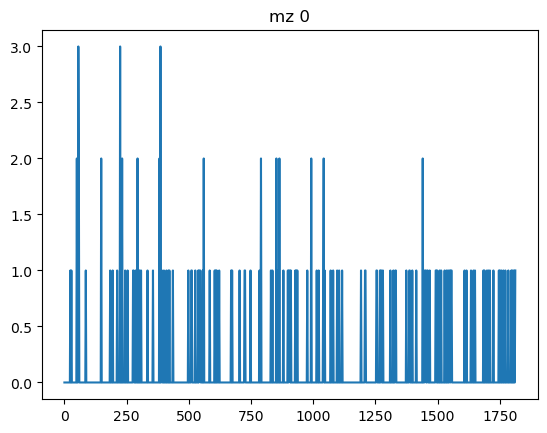

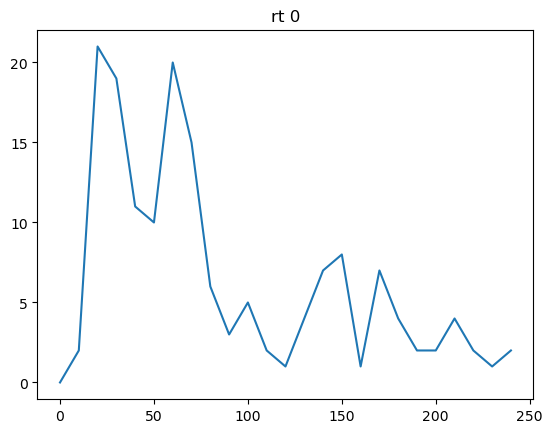

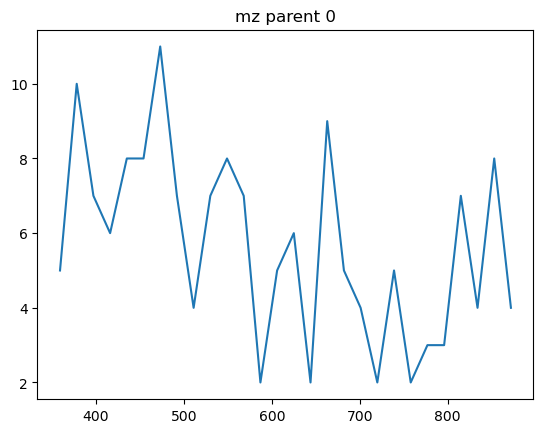

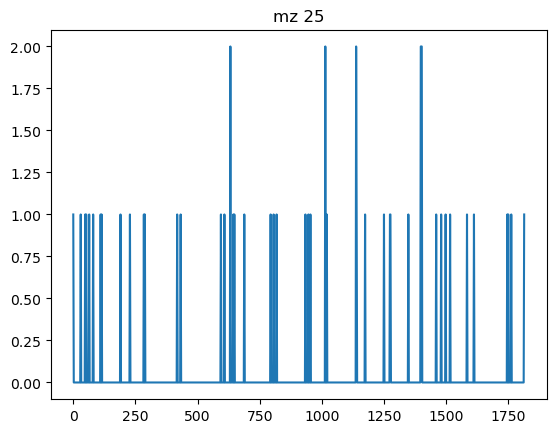

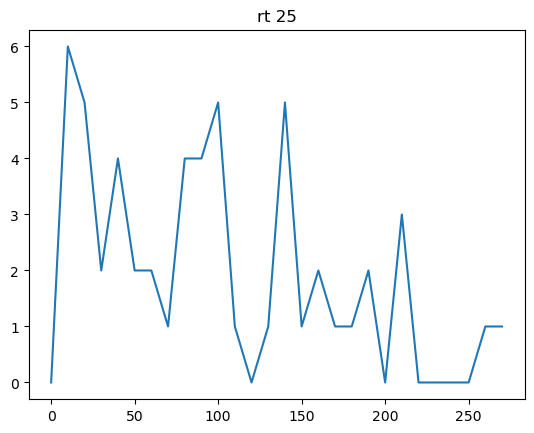

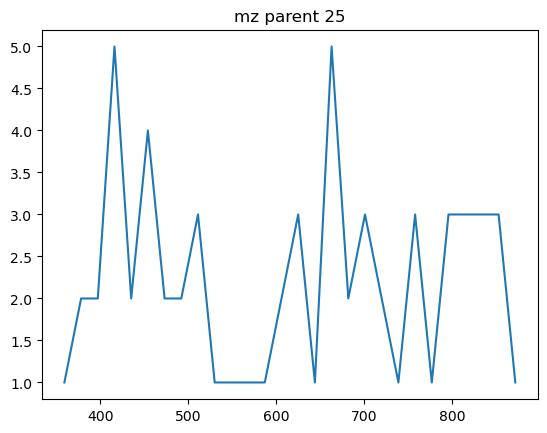

In [12]:
# Get the classes names
names = list(dfs['valid'].keys())
df = pd.DataFrame(np.zeros((len(indices), len(columns))), index=indices, columns=columns)

for name in names:
    # Split into mz_parent, mz, rt
    mz_parents = [int(float(f.split('_')[0])) for f in dfs['valid'][name].index]
    rts = [int(f.split('_')[1]) for f in dfs['valid'][name].index]
    mzs = [int(f.split('_')[2]) for f in dfs['valid'][name].index]

    # Make an empty dataframe with mz in x and rt in y
    indices = np.arange(0, np.max(mzs)+mz_bin, mz_bin)
    columns = np.arange(0, np.max(rts)+rt_bin, rt_bin)
    df = pd.DataFrame(np.zeros((len(indices), len(columns))), index=indices, columns=columns)
    # Fill the dataframe with the features
    for i, mz_parent in enumerate(mz_parents):
        mz = mzs[i]
        rt = rts[i]
        df.loc[mz, rt] += 1

# Plot the dataframe
plt.imshow(df)
plt.close()
# Plot the number of features in each mz bin
plt.plot(df.sum(axis=1))
plt.title(f'mz {name}')
plt.show()
plt.close()

# Plot the number of features in each rt bin
plt.plot(df.sum(axis=0))
plt.title(f'rt {name}')
plt.show()
plt.close()

mz_parents = [int(float(f.split('_')[0])) for f in dfs['valid'][name].index]
df = pd.Series(np.zeros(len(mz_parents)), index=mz_parents)
# Fill the dataframe with the features
for i, mz_parent in enumerate(mz_parents):
    df.loc[mz_parent] += 1

# Plot the number of features in each mz bin
plt.plot(df)
plt.title(f'mz parent {name}')
plt.show()
plt.close()


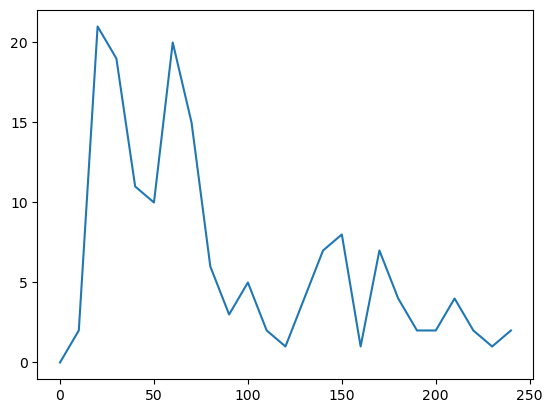

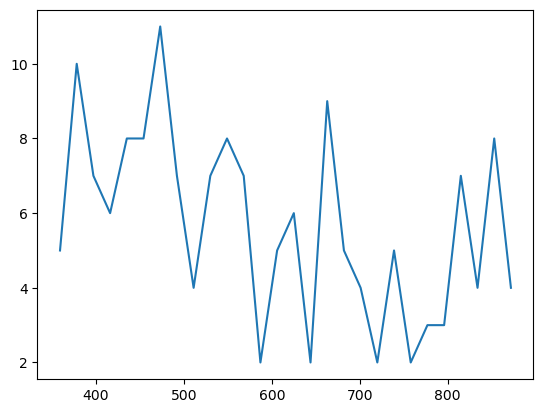